In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

For Income and Rating

In [47]:
dataset = pd.read_excel('Dataset.xlsx')
X = dataset.iloc[:, [3,4]].values
print(dataset)

     Cus_ID Sex  Age   Income  Rating
0    301219   M   23   306555      44
1    301220   F   26   306555      91
2    301221   F   24   326992       7
3    301222   M   28   326992      87
4    301223   F   38   347429      45
..      ...  ..  ...      ...     ...
195  301414   F   42  2452440      89
196  301415   F   54  2575062      32
197  301416   M   39  2575062      83
198  301417   M   39  2799869      21
199  301418   M   36  2799869      93

[200 rows x 5 columns]


In [15]:
# print(X)

Deciding Optimal No. of Clusters

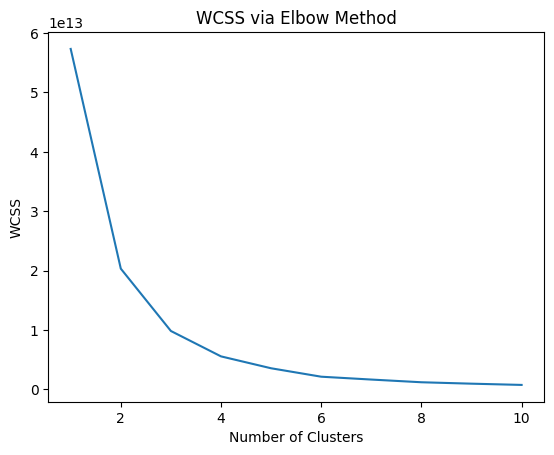

In [17]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 21)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.show()

```K Means Model Training on Training Set```

In [6]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state= 42 )
y_means = kmeans.fit_predict(X)

In [33]:
#print(y_means)

Visualizing Clusters

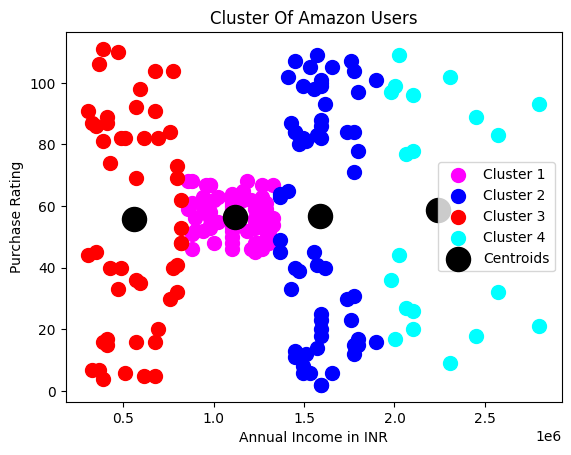

In [9]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s=100, c='magenta', label='Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c='black', label='Centroids')
plt.title('Cluster Of Amazon Users')
plt.xlabel('Annual Income in INR')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()

For Age and Rating

In [25]:
X1 = dataset.iloc[:, [2,4]].values
# print(X1)

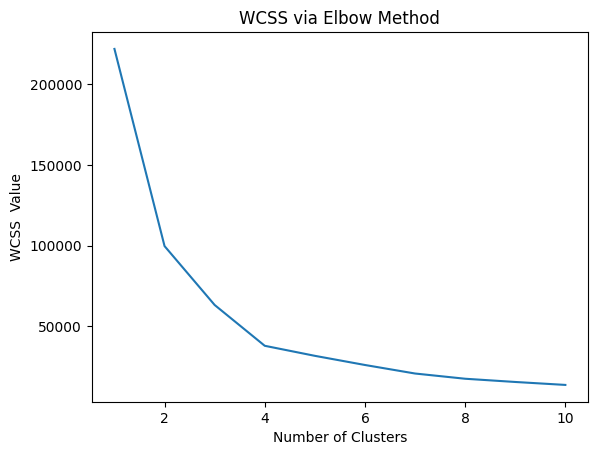

In [28]:
wcss1 = []

for i in range(1,11):
    kmeans1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 21)
    kmeans1.fit(X1)
    wcss1.append(kmeans1.inertia_)

plt.plot(range(1,11), wcss1)
plt.title('WCSS via Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS  Value")

plt.show()

In [29]:
kmeans1 = KMeans(n_clusters = 4, init='k-means++', random_state= 42 )
y_means1 = kmeans1.fit_predict(X1)

In [34]:
# print(y_means1)

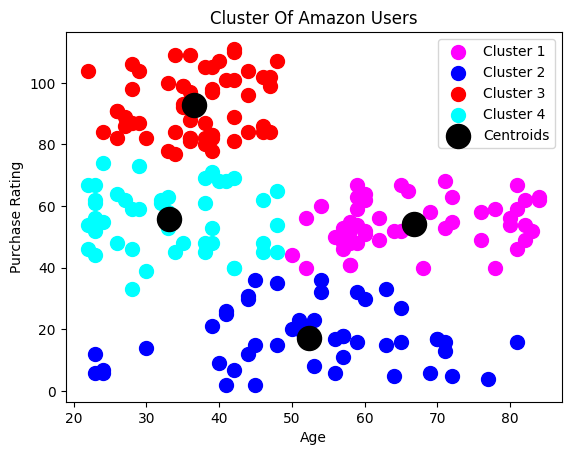

In [32]:
plt.scatter(X1[y_means1 == 0, 0], X1[y_means1 == 0, 1], s=100, c='magenta', label='Cluster 1')
plt.scatter(X1[y_means1 == 1, 0], X1[y_means1 == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X1[y_means1 == 2, 0], X1[y_means1 == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(X1[y_means1 == 3, 0], X1[y_means1 == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s= 300, c='black', label='Centroids')
plt.title('Cluster Of Amazon Users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()

For Sex and Rating

In [61]:
dataset1=pd.read_excel('Dataset.xlsx')
dataset1['Sex'] = dataset['Sex'].astype(str)
X2 = dataset1[['Sex', 'Rating']].values
# dataset1['Sex'] = dataset1['Sex'].map({'M': 1, 'F': 0}).fillna(dataset1['Sex'])
# X2 = dataset1.iloc[:, [1,4]].values
# print(X2)

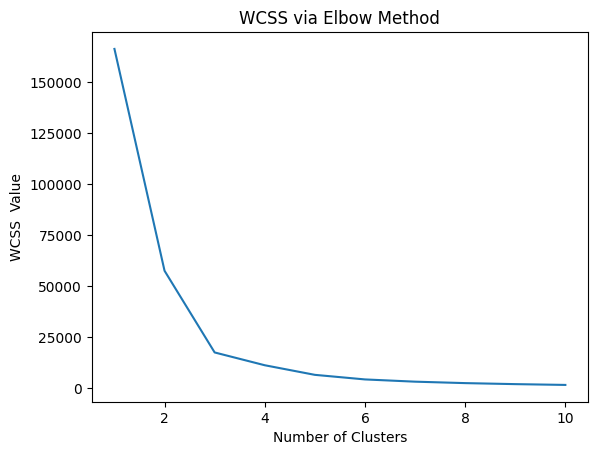

In [62]:
wcss2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 21)
    kmeans2.fit(X2)
    wcss2.append(kmeans2.inertia_)

plt.plot(range(1,11), wcss2)
plt.title('WCSS via Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS  Value")

plt.show()

In [65]:
kmeans2 = KMeans(n_clusters = 2, init='k-means++', random_state= 42 )
y_means2 = kmeans2.fit_predict(X2)

In [55]:
# print(y_means2)

In [78]:
# plt.scatter(X2[y_means2 == 0, 0], X2[y_means2 == 0, 1], s=100, c='magenta', label='Cluster 1')
# plt.scatter(X2[y_means2 == 1, 0], X2[y_means2 == 1, 1], s=100, c='blue', label='Cluster 2')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c='black', label='Centroids')
# plt.title('Cluster Of Amazon Users')
# plt.xlabel('Sex')
# plt.ylabel('Purchase Rating')
# plt.legend()
# plt.show()

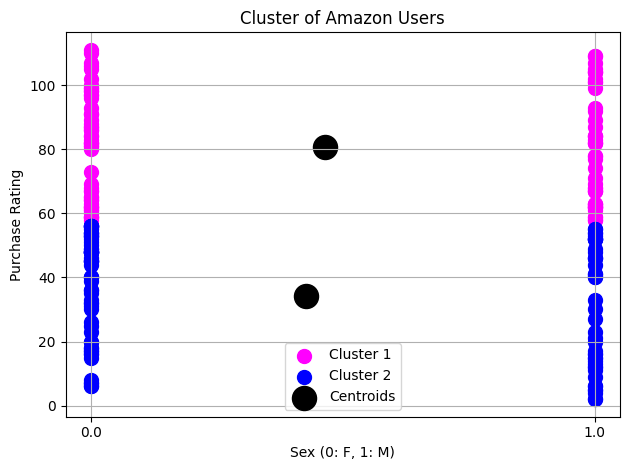

In [68]:
colors = ['magenta', 'blue']

# Create a scatter plot for each cluster
for cluster in range(2):
    plt.scatter(X2[y_means2 == cluster, 0], X2[y_means2 == cluster, 1], s=100, c=colors[cluster], label=f'Cluster {cluster+1}')

# Plot the centroids
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='black', label='Centroids')

plt.title('Cluster of Amazon Users')
plt.xlabel('Sex (0: F, 1: M)')
plt.ylabel('Purchase Rating')
plt.legend()
plt.grid(True)  # Add grid lines to the plot
plt.tight_layout()  # Improve spacing between elements
plt.show()

Age and Sex

In [79]:
dataset1['Sex'] = dataset1['Sex'].astype(str)

# Extract the relevant columns for clustering
X3 = dataset1[['Age', 'Sex', 'Rating']].copy()

# Map 'Sex' to numerical values (0: F, 1: M)
X3['Sex'] = X3['Sex'].map({'F': 0, 'M': 1}).fillna(X3['Sex'])
# dataset1['Sex'] = dataset1['Sex'].map({'M': 1, 'F': 0}).fillna(dataset1['Sex'])

# print(X3)



In [76]:
# Perform k-means clustering with 2 clusters
kmeans3 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_means3 = kmeans3.fit_predict(X3)



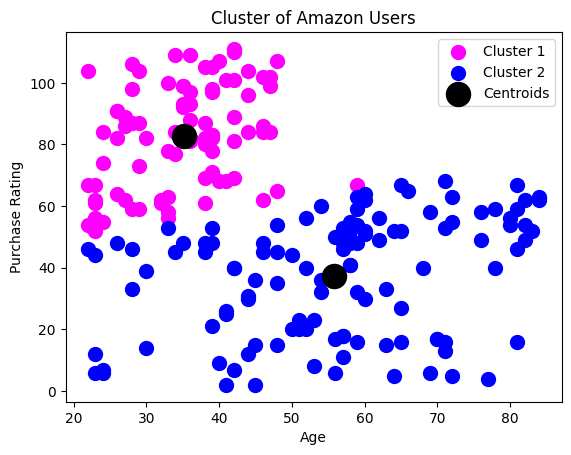

In [77]:
# Plot the clusters
plt.scatter(X3[y_means3 == 0]['Age'], X3[y_means3 == 0]['Rating'], s=100, c='magenta', label='Cluster 1')
plt.scatter(X3[y_means3 == 1]['Age'], X3[y_means3 == 1]['Rating'], s=100, c='blue', label='Cluster 2')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 2], s=300, c='black', label='Centroids')

plt.title('Cluster of Amazon Users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()

In [82]:
dataset1['Cluster'] = y_means3

# Perform analysis on the clusters
cluster_analysis = dataset1.groupby('Cluster').mean()

# Print the cluster analysis
print(cluster_analysis)

                Cus_ID        Age        Income     Rating
Cluster                                                   
0        301323.258824  35.117647  1.270701e+06  82.905882
1        301314.982609  55.756522  1.213247e+06  37.339130


C:\Users\vedan\AppData\Local\Temp\ipykernel_25464\2014695929.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = dataset1.groupby('Cluster').mean()
